In [1]:
from selenium import webdriver
from datetime import datetime, timedelta
from selenium.webdriver.common.by import By as by
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
import time
import seaborn as sns
import pandas as pd
import numpy as np

In [329]:
driver = webdriver.Edge(executable_path="C:/Users/smart/Downloads/edgedriver_win64/msedgedriver.exe")
driver.get('https://www.instagram.com/accounts/login/')

C:\Users\smart\AppData\Local\Temp/ipykernel_12104/2497200348.py:1: DeprecationWarning:

executable_path has been deprecated, please pass in a Service object



In [330]:
driver.maximize_window()
wait = WebDriverWait(driver, 15)

##### Login function

In [4]:
def LoginInstagram(username, password):
#     try:
        # It waits until condition becomes true in given 8 sec if page takes more than time to load it's thrown error
        wait.until(EC.presence_of_element_located((by.NAME, 'username'))).send_keys(username)
        # It waits until condition becomes true in given 8 sec if page takes more than time to load it's thrown error
        wait.until(EC.presence_of_element_located((by.NAME, 'password'))).send_keys(password)
        wait.until(EC.element_to_be_clickable((by.TAG_NAME, 'button'))).submit()
        
        # logging is taking time so that's why here give sleep time
        time.sleep(6)
        driver.find_element(by.CLASS_NAME, '_acan._acao._acas').click()
        print('Logged In SuccessFully')
#     except Exception:
#         print('error')
        

In [5]:
username = 'testAccountselenium'
password = 'selenium123'

In [332]:
LoginInstagram(username, password)

Logged In SuccessFully


#### search and open from previous project

In [10]:
def search_and_open(username):
    try:
        driver.find_element(by.LINK_TEXT, 'Search').click() #search button
        wait.until(EC.presence_of_element_located((by.CLASS_NAME, '_aauy'))).send_keys(username) #search text enter
        time.sleep(2)
        wait.until(EC.presence_of_element_located((by.CLASS_NAME, '_abm4'))).click()
        print("Opened Profile: ", username)
    except Exception:
        print("Something Went Wrong Try Again!")

In [22]:
search_and_open('food')

Opened Profile:  food


#### search_getList from previous project

In [9]:
def search_getList(text): # it take text as input to search
    try:
        driver.find_element(by.LINK_TEXT, 'Search').click() #search button
        driver.find_element(by.CLASS_NAME, '_aauy').send_keys(text) #search text enter

        find_all = driver.find_element(by.CLASS_NAME, 'xhtitgo.xh8yej3.x1n2onr6.x5yr21d.xdt5ytf.x78zum5.x1wzhzgj.x6s0dn4') # retreive whole class of the profiles what we searched
        time.sleep(8) #sleep for 8 seconds
        profiles = []
        data = bs(find_all.get_attribute('outerHTML'), 'html.parser') # loading into beautiful soup
        a = data.find_all('a')[:10]
        for i in a:
            # checking the any hastags or location
            if 'tags' in i['href'].strip('/').split('/') or 'locations' in i['href'].strip('/').split('/'):
                continue
            else:
                # it will print only usernames
                profiles.append(i['href'].strip('/'))
        time.sleep(3)
        driver.find_element(by.CLASS_NAME, 'x1n2onr6.x6s0dn4.x78zum5').click()
        return profiles
    except KeyboardInterrupt:
        print("You Have Stopped..")
    except Exception:
        print("Something Went Wrong!")

#### 1.Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.

In [10]:
list_food = search_getList('food') # extractiong top 10 from search list

In [11]:
list_food # food blog names list

['_foodovereverything',
 'foodmonksofficial',
 'foodies_ikkada',
 'foodvineshyd',
 'nom.nom.foodie',
 'street_foods_hyderabad',
 'food',
 'foodies_in_hyderabad',
 'maayabazar_food',
 'foodtalkindia']

#### finding the followers 

In [327]:
# finding the follower of the list
def max_followers(list_food):
    li = [] # it stores the followers
    for i in list_food: # iterate all profiles
        # it search and open profile
        search_and_open(i)
        time.sleep(3) # sleep to load the page
        followers=driver.find_element(by.XPATH, '//*[@id="mount_0_0_pV"]/div/div/div/div[1]/div/div/div/div[1]/div[2]/div[2]/section/main/div/header/section/ul/li[2]/a/div/span')
        # printing the followers
        print(followers.get_attribute('title'))
        # appendting the followers into the list
        li.append(followers.get_attribute('title'))
        driver.back()
        time.sleep(2)
    return li # return the followers list

In [19]:
followers = max_followers(list_food) # extracting followers list

Opened Profile:  _foodovereverything
11,038
Opened Profile:  foodmonksofficial
4,409
Opened Profile:  foodies_ikkada
90,865
Opened Profile:  foodvineshyd
1,306
Opened Profile:  nom.nom.foodie
109,597
Opened Profile:  street_foods_hyderabad
1,130
Opened Profile:  food
11,144
Opened Profile:  foodies_in_hyderabad
11,144
Opened Profile:  maayabazar_food
38,831
Opened Profile:  foodtalkindia
308,802


In [20]:
li = followers.copy() # making copy to variable for future reference
li

['11,038',
 '4,409',
 '90,865',
 '1,306',
 '109,597',
 '1,130',
 '11,144',
 '11,144',
 '38,831',
 '308,802']

#### followers string to int converting function

In [21]:
# the list returning the string with "," this function remove the , and convert into int
def converttoINT(li):
    followers = [] # follower in integers
    for i in li:
        f=''
        li = i.split(',') # spliting bases on ','
        f=li[0]+li[1] # concating the string 
        followers.append(int(f)) # converting into int
    return followers # returning the list

In [22]:
followers_int = converttoINT(li) 
followers_int #converted list

[11038, 4409, 90865, 1306, 109597, 1130, 11144, 11144, 38831, 308802]

In [23]:
di = {'username':list_food, 'followers':followers_int} # converting into dictionary

In [ ]:
# we can sort and print dict only but i am usign dataframe.

In [24]:
df_followers = pd.DataFrame(di, index=None) # converting into dataframe

In [25]:
# sorting values in descending order based on followers column
df_followers = df_followers.sort_values(by='followers', ascending=False) 

##### 1.1 From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers

In [26]:
print(df_followers.iloc[:5]) # printing the top 5 followers

          username  followers
9    foodtalkindia     308802
4   nom.nom.foodie     109597
2   foodies_ikkada      90865
8  maayabazar_food      38831
6             food      11144


In [235]:
def Avg_likes(likes, posts):
    avg = likes // posts
    return avg

In [60]:
x = df_followers['username'][:5]
y = df_followers['followers'][:5]
plotly.pie(df_followers, names=x, values=y, height=500, width=500, title='Top 5 Users which have high followers.')

#### 1.2 Now Find the number of posts these handles have done in the previous 3 days.

In [340]:
def Posts(username, no_of_days):
        # clicking on the first post from profile
        search_and_open(username)
        wait.until(EC.presence_of_element_located((by.CLASS_NAME, '_aabd._aa8k._aanf'))).click()
        posts = 0
        while True:
            time.sleep(2)
            post_time = driver.find_element(by.XPATH, '//time[@class="_aaqe"]').get_attribute('datetime')
            date_of_post = datetime.strptime(post_time[0:19], "%Y-%m-%dT%H:%M:%S")
            if (datetime.now() - date_of_post).days < no_of_days:
                posts += 1
                driver.find_element(by.CLASS_NAME, '_aaqg._aaqh').click()
            else:
                driver.find_element(by.CLASS_NAME, '_aaqg._aaqh').click()
                break    
        driver.back()
        return posts

In [324]:
Posts('foodies_ikkada', 3)

Opened Profile:  foodies_ikkada


2

In [118]:
username = list(df_followers['username'][:5])
username

['foodtalkindia',
 'nom.nom.foodie',
 'foodies_ikkada',
 'maayabazar_food',
 'food']

In [342]:
posts_dict = {}
# using loop extracting posts count in last three days
for i in li:
    time.sleep(3) # wait for page load
# this function take two argument username and no.of days and return the count of post in that days
    post = Posts(i, 3)
    posts_dict[i] = post
    driver.back()

Opened Profile:  foodtalkindia
Opened Profile:  nom.nom.foodie
Opened Profile:  foodies_ikkada
Opened Profile:  maayabazar_food
Opened Profile:  food


#### 1.2 Now Find the number of posts these handles have done in the previous 3 days.

In [343]:
for i in posts_dict:
    print(f'{i} -Posts-> {posts_dict[i]} in last Three Days')

foodtalkindia -Posts-> 3 in last Three Days
nom.nom.foodie -Posts-> 1 in last Three Days
foodies_ikkada -Posts-> 2 in last Three Days
maayabazar_food -Posts-> 0 in last Three Days
food -Posts-> 0 in last Three Days


#### 1.3 Depict this information using a suitable graph.

#### For better visualization I am using plotly

In [345]:
# for using plotly we need to convert data into dataframe
username = list(posts_dict.keys())
y=list(posts_dict.values())
di = {'username': username, 'recent_posts': y}
df_posts = pd.DataFrame(di)
plotly.bar(df_posts,x='username', y='recent_posts', range_y=[0, 4], height=400, color='username', title='Top 5 Most Follwers Recent Posts Last 3 Days')

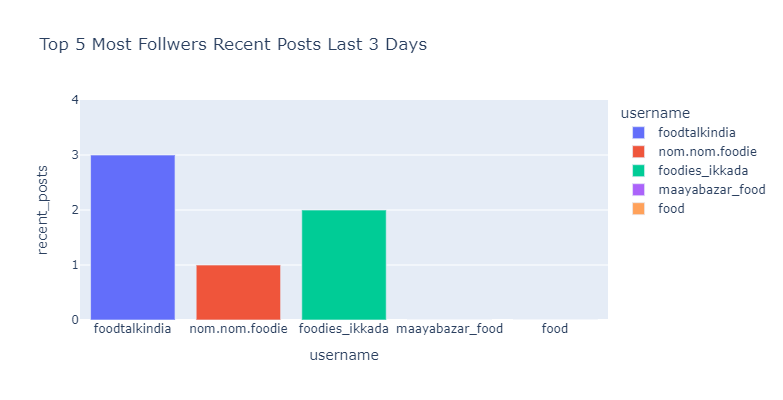

#### 2. Your friend also needs a list of hashtags that he should use in his posts.


In [271]:
def hastags(username, n):
        time.sleep(2)
        search_and_open(username)
        wait.until(EC.presence_of_element_located((by.CLASS_NAME, '_aabd._aa8k._aanf'))).click()
        hashtag = []
        for i in range(1, n+1):
            time.sleep(3)
            h = driver.find_element(by.CLASS_NAME, '_aacl._aaco._aacu._aacx._aad7._aade').get_attribute('innerHTML')
            data = bs(h, 'html.parser')
            data_s = data.find_all('a') 
            for i in data_s:
                a = i.string
                if a[0] != '#':
                    continue
                else:
                    hashtag.append(a)
            time.sleep(3)
            driver.find_element(by.CLASS_NAME, '_aaqg._aaqh').click()
        driver.back()
        return hashtag
    

#### 2.1 Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.

In [258]:
# testing the code and extracted hastags success
data = hastags('foodtalkiindia', 10)

Opened Profile:  foodtalkiinda


In [274]:
username

['foodtalkindia',
 'nom.nom.foodie',
 'foodies_ikkada',
 'maayabazar_food',
 'food']

In [272]:
hashtag_dict={'foodtalkindia': data}
'''while testing the code i extracted 2 profiles foodtalkindia this you can see above this, 
nom.nom.foodie, hastags , I extracted nom.nom.foodie testing the code it's success but 
for the next profile thown error well i fixed it and running from 2 index of the list'''
for i in username[2:]:
    time.sleep(2)
    h = hastags(i, 10)
    hashtag_dict[i] = h
    driver.back()

Opened Profile:  foodies_ikkada
Opened Profile:  maayabazar_food
Opened Profile:  food


In [283]:
hashtag_dict

{'foodtalkindia': ['#ginexplorersclub',
  '#burgers',
  '#rudys',
  '#bengaluru',
  '#mythicaledition',
  '#foodtalkindia',
  '#foodtalk',
  '#drinks',
  '#fti',
  '#food',
  '#foodie',
  '#foodies',
  '#foodgram',
  '#foodgasm',
  '#foodiesofindia',
  '#foodblogger',
  '#foodfeed',
  '#delicious',
  '#yummy',
  '#instagood',
  '#instafood',
  '#instagram',
  '#discover',
  '#burgers',
  '#burgerama',
  '#ginexplorersclub',
  '#GinOClock',
  '#bengaluru',
  '#gin',
  '#drinks',
  '#mythicaledition',
  '#foodtalkindia',
  '#foodtalk',
  '#fti',
  '#food',
  '#foodie',
  '#foodies',
  '#foodgram',
  '#foodgasm',
  '#foodiesofindia',
  '#foodblogger',
  '#foodfeed',
  '#delicious',
  '#yummy',
  '#instagood',
  '#instafood',
  '#instagram',
  '#discover',
  '#NewInTown',
  '#gorillazpizzeria',
  '#pizza',
  '#mignightcravings',
  '#midnightsnacks',
  '#gourmet',
  '#delivery',
  '#neapolitan',
  '#foodtalkindia',
  '#foodtalk',
  '#fti',
  '#food',
  '#foodie',
  '#foodies',
  '#foodgram'

#### 2.2 Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.

In [288]:
# creating frequency dictionay
freq = {}
# accessing the key
for i in hashtag_dict:
    # accessing the list
    val = hashtag_dict[i]
    for j in val: # itereating through list
        if j in freq: # checking if hashtag is present
            freq[j] += 1 # if hastag present in dict it increace frequency with 1
        else:
            freq[j] = 0  # else it create key and assing 0 as value
        

In [291]:
freq

{'#ginexplorersclub': 1,
 '#burgers': 1,
 '#rudys': 0,
 '#bengaluru': 1,
 '#mythicaledition': 1,
 '#foodtalkindia': 9,
 '#foodtalk': 9,
 '#drinks': 1,
 '#fti': 9,
 '#food': 25,
 '#foodie': 12,
 '#foodies': 11,
 '#foodgram': 10,
 '#foodgasm': 9,
 '#foodiesofindia': 9,
 '#foodblogger': 24,
 '#foodfeed': 9,
 '#delicious': 9,
 '#yummy': 9,
 '#instagood': 9,
 '#instafood': 19,
 '#instagram': 18,
 '#discover': 9,
 '#burgerama': 0,
 '#GinOClock': 0,
 '#gin': 0,
 '#NewInTown': 2,
 '#gorillazpizzeria': 0,
 '#pizza': 1,
 '#mignightcravings': 0,
 '#midnightsnacks': 0,
 '#gourmet': 0,
 '#delivery': 0,
 '#neapolitan': 0,
 '#mithai': 0,
 '#sweets': 1,
 '#diwali': 0,
 '#festive': 1,
 '#diwaliparty': 0,
 '#festiveseason': 0,
 '#horoscope': 1,
 '#zodiacsigns': 1,
 '#tsukipune': 0,
 '#japanese': 0,
 '#cantonese': 0,
 '#thai': 0,
 '#cuisine': 0,
 '#rooftop': 0,
 '#restaurant': 0,
 '#barcarts': 0,
 '#happyhours': 0,
 '#bar': 0,
 '#trolley': 0,
 '#ikea': 0,
 '#speedx': 0,
 '#rum': 0,
 '#homegrown': 0,
 '#w

In [302]:
h = list(freq.keys())
f = list(freq.values())
di = {'Hashtags': h, 'Frequency':f}
df_hashtags = pd.DataFrame(di)
df_hashtags

,Hashtags,Frequency
0,#ginexplorersclub,1
1,#burgers,1
2,#rudys,0
3,#bengaluru,1
4,#mythicaledition,1
...,...,...
172,#chat,0
173,#gappevappe,0
174,#caffine,0
175,#cappuccino,0


#### 2.3 Create a csv file with two columns : the word and its frequency

In [303]:
df_hashtags.to_csv('hashtag_frequency.csv', index=False) # it converts into csv and dropping index

#### 2.4 Now, find the hashtags that were most popular among these bloggers

In [346]:
df_hashtags = df_hashtags.sort_values('Frequency', ascending=False)
# top 10 popular hashtags with it's frequencies
df_hashtags.reset_index(drop=True, inplace=True) # resetting index after sorting 
df_hashtags.head(10)
# food is most popular among these its frequency is high

,Hashtags,Frequency
0,#food,25
1,#foodblogger,24
2,#instafood,19
3,#instagram,18
4,#foodiesofinstagram,18
5,#reelsinstagram,14
6,#foodie,12
7,#hyderabadfoodie,11
8,#foodies,11
9,#biryani,11


#### 2.5 Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

In [356]:
# for better visual experince i am using the plotly
x = df_hashtags['Hashtags'][:5] # Top 5 Hastags Names
y = df_hashtags['Frequency'][:5] # Top 5 Hastags Frequencies

#note: I don't know that
plotly.pie(df_hashtags, names=x, values=y, height=500, width=500, title='Top 5 Hashtags')

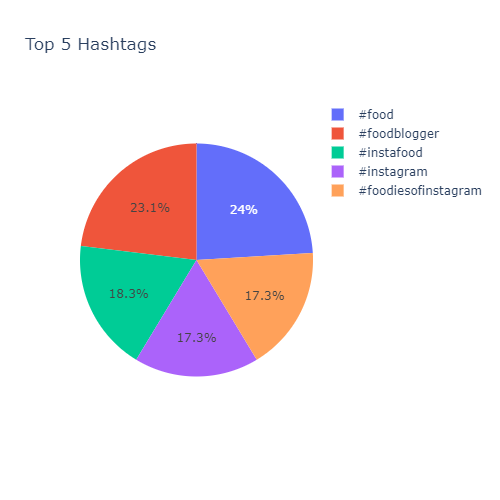

#### 3You need to also calculate average followers : likes ratio for the obtained handles. Followers : Likes ratio is calculated as follows:

In [368]:
username

['foodtalkindia',
 'nom.nom.foodie',
 'foodies_ikkada',
 'maayabazar_food',
 'food']

In [159]:
li = ['foodtalkindia',
 'nom.nom.foodie',
 'foodies_ikkada',
 'maayabazar_food',
 'food']

In [318]:
def likes_of_posts(username):
    search_and_open(username)
    Total = 0
    wait.until(EC.presence_of_element_located((by.CLASS_NAME, '_aabd._aa8k._aanf'))).click()
    time.sleep(2)
    time.sleep(3)
    for i in range(1, 11):
        wait.until(EC.presence_of_element_located((by.LINK_TEXT, 'others'))).click()
        frame = wait.until(EC.presence_of_element_located((by.XPATH,'//*[@id="mount_0_0_pV"]/div/div/div/div[2]/div/div/div[2]/div/div/div[1]/div/div[2]/div/div/div/div/div[2]/div/div[3]/div')))
        for i in range(50):
            time.sleep(2)
            li = driver.find_elements(by.CLASS_NAME, '_ab8y._ab94._ab97._ab9f._ab9k._ab9p._abcm')
            Total += len(li)
            driver.execute_script('arguments[0].scrollTop=arguments[0].scrollHeight',frame)
        driver.find_element(by.CLASS_NAME, '_ac7b._ac7d').click()
        wait.until(EC.presence_of_element_located((by.CLASS_NAME, '_aaqg._aaqh'))).click()

        return Total

#### due to some instagram privacy features
#### user only can see the total number of people who liked this post. but I extracted maximum

#### 3.1 Find out the likes of the top 10 posts of the 5 handles obtained earlier.

In [170]:
li

['foodtalkindia',
 'nom.nom.foodie',
 'foodies_ikkada',
 'maayabazar_food',
 'food']

In [201]:
foodtalkindia_likes = likes_of_posts('foodtalkindia')

Opened Profile:  foodtalkindia


In [202]:
foodtalkindia_likes

6409

In [218]:
nom_likes = likes_of_posts('nom.nom.foodie')

Opened Profile:  nom.nom.foodie


In [219]:
nom_likes

7290

In [214]:
foodies_likes = likes_of_posts('foodies_ikkada')

Opened Profile:  foodies_ikkada


In [215]:
foodies_likes

4710

In [207]:
maayabazarfood_likes = likes_of_posts('maayabazar_food')

Opened Profile:  maayabazar_food


In [208]:
maayabazarfood_likes

6526

In [210]:
food_likes = likes_of_posts('food')

Opened Profile:  food


In [217]:
food_likes

6119

In [220]:
likes = [foodtalkindia_likes, nom_likes, foodies_likes, maayabazarfood_likes, food_likes]

In [224]:
for i in range(len(likes)):
    print(li[i], '--->', likes[i])

foodtalkindia ---> 6409
nom.nom.foodie ---> 7290
foodies_ikkada ---> 4710
maayabazar_food ---> 6526
food ---> 6119


In [235]:
def Avg_likes(likes, posts):
    avg = likes // posts
    return avg

#### 3.2 Calculate the average likes for a handle.

In [246]:
followers = [308802, 109597, 90865, 38831, 11144] #this data is taken already extracted you can find above

In [255]:
avg_likes_dict={}
followers_dict={}
for i in range(len(followers)):
    followers_dict[li[i]]=followers[i]

In [265]:
for i in range(len(likes)):
    avg = likes[i]//10
    avg_likes_dict[li[i]] = avg
    print(li[i], '------->',avg)

foodtalkindia -------> 640
nom.nom.foodie -------> 729
foodies_ikkada -------> 471
maayabazar_food -------> 652
food -------> 611


#### 3.3 Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.

In [297]:
avg_like_followers ={}
for i in li:
    avg_followers_count = int(followers_dict[i]/avg_likes_dict[i])
    avg_like_followers[i]=avg_followers_count
    print(i,'---->',avg_followers_count,':',int(avg_likes_dict[i]))

foodtalkindia ----> 482 : 640
nom.nom.foodie ----> 150 : 729
foodies_ikkada ----> 192 : 471
maayabazar_food ----> 59 : 652
food ----> 18 : 611


#### 3.4 Create a bar graph to depict the above obtained information.

In [286]:
likes_dict = {'usernames': li, "likes": avg_likes_dict.values()}

In [287]:
df_avg_likes = pd.DataFrame(likes_dict)
df_avg_likes

,usernames,likes
0,foodtalkindia,640
1,nom.nom.foodie,729
2,foodies_ikkada,471
3,maayabazar_food,652
4,food,611


In [312]:
plotly.bar(df_avg_likes, x='usernames', y='likes', range_y=[0, 1000], title='AVERAGE LIKES FOR EACH HANDLE', color='usernames')

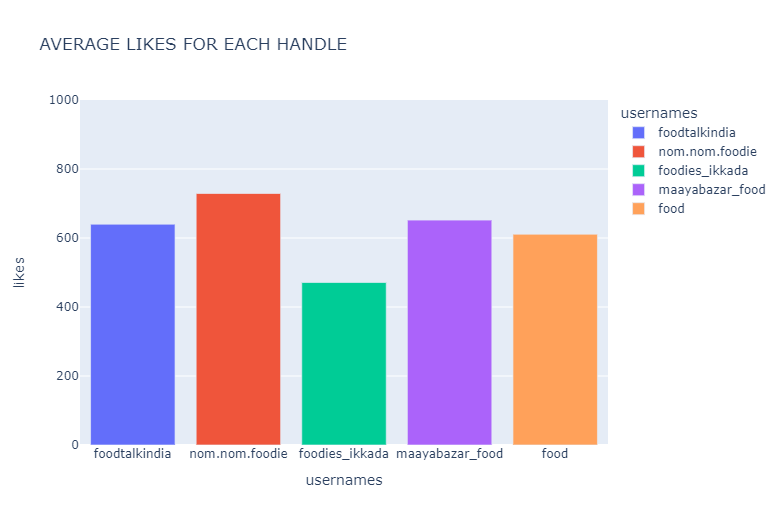

In [306]:
likes_dict = {'usernames': li, "likes": avg_like_followers.values()}
df_avg_follow_likes = pd.DataFrame(likes_dict)
df_avg_follow_likes

,usernames,likes
0,foodtalkindia,482
1,nom.nom.foodie,150
2,foodies_ikkada,192
3,maayabazar_food,59
4,food,18


In [348]:
plotly.bar(df_avg_follow_likes, x='usernames', y='likes', range_y=[0, 700], title='AVERAGE LIKES FOR EACH HANDLE')

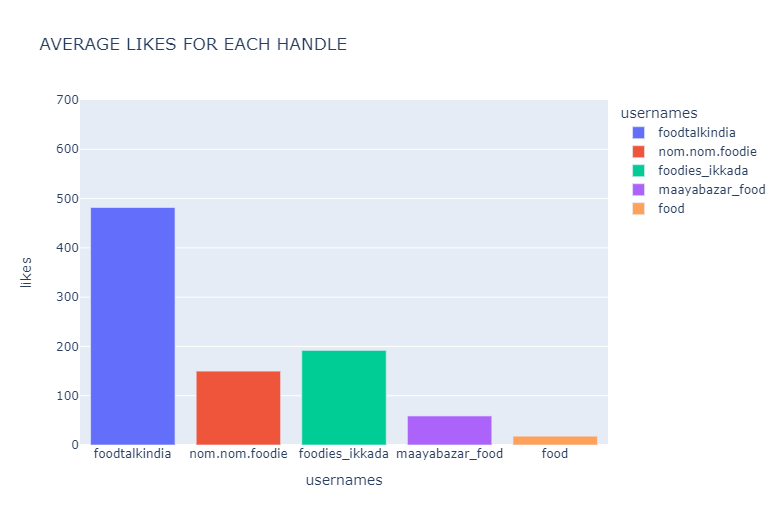